# Progetto Web Intelligence
Scodeller Giovanni 864906

# Caricamento Dati e EDA

In [87]:
# LIBRERIE
import pandas as pd
import numpy as np

from function import addPrevWin, addRateo, addFieldWR, loadDataset, randomSwap, generalFormatting, tournamentSimulation, confusionMatrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [88]:
# CARICAMENTO DATI
df2017 = loadDataset("2017")
df2017

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2017-01-01,ATP250,Outdoor,Hard,1st Round,3,Thompson J.,...,1.22,3.50,1.30,3.50,1.31,3.73,1.33,3.90,1.29,3.50
1,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Mahut N.,...,1.45,2.35,1.53,2.50,1.58,2.52,1.59,2.55,1.54,2.43
2,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Ferrer D.,...,1.88,1.75,2.00,1.80,2.10,1.81,2.15,1.82,2.01,1.77
3,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Edmund K.,...,1.35,2.75,1.40,3.00,1.42,3.09,1.42,3.25,1.37,3.01
4,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.38,2.65,1.40,3.00,1.41,3.13,1.46,3.13,1.41,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,67,London,Masters Cup,2017-11-17,Masters Cup,Indoor,Hard,Round Robin,3,Goffin D.,...,1.95,1.75,2.00,1.80,2.13,1.80,2.15,1.91,2.05,1.79
2629,67,London,Masters Cup,2017-11-17,Masters Cup,Indoor,Hard,Round Robin,3,Dimitrov G.,...,1.20,4.10,1.22,4.33,1.24,4.57,1.29,4.57,1.23,4.25
2630,67,London,Masters Cup,2017-11-18,Masters Cup,Indoor,Hard,Semifinals,3,Goffin D.,...,7.25,1.06,7.50,1.08,10.37,1.08,10.37,1.12,8.45,1.08
2631,67,London,Masters Cup,2017-11-18,Masters Cup,Indoor,Hard,Semifinals,3,Dimitrov G.,...,1.38,2.80,1.40,2.75,1.44,3.07,1.45,3.20,1.40,2.95


In [89]:
# ESPLORIAMO IL CONTENUTO DI UNA ENTRY
row = df2017.loc[140]
for i in df2017.columns:
    print(i,":", row[i])

ATP : 6
Location : Melbourne
Tournament : Australian Open
Date : 2017-01-16 00:00:00
Series : Grand Slam
Court : Outdoor
Surface : Hard
Round : 1st Round
Best of : 5
Winner : Chardy J.
Loser : Almagro N.
WRank : 72
LRank : 42.0
WPts : 705
LPts : 1040.0
W1 : 4.0
L1 : 0.0
W2 : nan
L2 : nan
W3 : nan
L3 : nan
W4 : nan
L4 : nan
W5 : nan
L5 : nan
Wsets : 0.0
Lsets : 0.0
Comment : Retired
B365W : 1.8
B365L : 2.0
EXW : 1.82
EXL : 1.82
LBW : 1.8
LBL : 2.0
PSW : 1.86
PSL : 2.05
MaxW : 1.86
MaxL : 2.06
AvgW : 1.81
AvgL : 1.97


In [90]:
# VEDIAMO I TIPI DI DATO DELLE FEATURE
df2017.dtypes

ATP                    int64
Location              object
Tournament            object
Date          datetime64[ns]
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Winner                object
Loser                 object
WRank                  int64
LRank                float64
WPts                   int64
LPts                 float64
W1                   float64
L1                   float64
W2                   float64
L2                   float64
W3                   float64
L3                   float64
W4                   float64
L4                   float64
W5                   float64
L5                   float64
Wsets                float64
Lsets                float64
Comment               object
B365W                float64
B365L                float64
EXW                  float64
EXL                  float64
LBW                  float64
LBL                  float64
PSW           

In [91]:
# FEATURE POTENZIALMENTE CATEGORIALI O FATTORIALI
strcol=[]
for col in df2017.columns:
    if type(df2017[col][0]) == str:
        strcol.append(col)
strcol 

['Location',
 'Tournament',
 'Series',
 'Court',
 'Surface',
 'Round',
 'Winner',
 'Loser',
 'Comment']

# Funzione per una formattazione generale del dataset

In questa funzione viene anche aggiunto la colonna "target", la feature che andremmo a prevedere.

Inoltre la funzione ***generalFormatting*** si preoccupa di cambiare il nome delle feature rendendole anonime, "Winner" -> "Player1" e "Loser" -> "Player2", poi applica varie tecniche per formattare i dati.
In generale le tecniche applicate sono:
+ le colonne che contengono valori nulli vengono sistemati a criterio, se un giocatore non ha punti in classifica entra con il minor numero di punti.
+ Le colonne che contengono delle categorie, come "Court", "Surface" e "Best of" viene applicato il OneHotEncoding che crea tante feature tante quante sono le categorie di quella feature assegnando valori 0 o 1. Esempio: "Court" contiene "Indoor" e "Outdoor", verrano create "Court_Indoor" e "Court_Outdoor"
+ Altre variabili come "Series" viene applicato il label enconding, ovvero viene data un'ettichetta numerica ad ogni classe della feature

In [92]:
df2017 = generalFormatting(df2017)
df2017

,Tournament,Date,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,...,P1_Avg,P2_Avg,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Best of_3,Best of_5,target
0,15,2017-01-01,0,1,Thompson J.,Ymer E.,79,160.0,689,372.0,...,1.29,3.50,0,1,0,0,1,1,0,0
1,15,2017-01-02,0,1,Mahut N.,Robert S.,39,54.0,1102,854.0,...,1.54,2.43,0,1,0,0,1,1,0,0
2,15,2017-01-02,0,1,Ferrer D.,Tomic B.,21,26.0,1785,1465.0,...,2.01,1.77,0,1,0,0,1,1,0,0
3,15,2017-01-02,0,1,Edmund K.,Escobedo E.,45,141.0,1001,443.0,...,1.37,3.01,0,1,0,0,1,1,0,0
4,15,2017-01-02,0,1,Dimitrov G.,Johnson S.,17,33.0,2035,1320.0,...,1.41,2.85,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,39,2017-11-17,3,0,Goffin D.,Thiem D.,8,4.0,2975,3815.0,...,2.05,1.79,1,0,0,0,1,1,0,0
2629,39,2017-11-17,3,0,Dimitrov G.,Carreno Busta P.,6,10.0,3650,2615.0,...,1.23,4.25,1,0,0,0,1,1,0,0
2630,39,2017-11-18,3,6,Goffin D.,Federer R.,8,2.0,2975,9005.0,...,8.45,1.08,1,0,0,0,1,1,0,0
2631,39,2017-11-18,3,6,Dimitrov G.,Sock J.,6,9.0,3650,2765.0,...,1.40,2.95,1,0,0,0,1,1,0,0


# Prima prova applicazione modello

droppiamo le colonne che non posso essere calcolate a priori, ovvero quelle variabili che non si possono sapere senza avere già chi ha vinto o perso

In [93]:

df2017.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2017")


Loaded 2017


In [94]:
df2017.head()

,Tournament,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Best of_3,Best of_5,target
0,15,0,1,Thompson J.,Ymer E.,79,160.0,689,372.0,0,1,0,0,1,1,0,0
1,15,0,1,Mahut N.,Robert S.,39,54.0,1102,854.0,0,1,0,0,1,1,0,0
2,15,0,1,Ferrer D.,Tomic B.,21,26.0,1785,1465.0,0,1,0,0,1,1,0,0
3,15,0,1,Edmund K.,Escobedo E.,45,141.0,1001,443.0,0,1,0,0,1,1,0,0
4,15,0,1,Dimitrov G.,Johnson S.,17,33.0,2035,1320.0,0,1,0,0,1,1,0,0


 # Applicazione modello stupido
In questo modello diciamo che il giocatore più forte, ovvero quello che in classifica ha il numero più basso, vincerà sempre

In [95]:
y_test = df2017["target"]
y_pred = []
for i in range(0,df2017.shape[0]):
    y_pred.append(np.where(df2017.loc[i,"P1_Rank"] < df2017.loc[i,"P2_Rank"], 0, 1))
    
print("Accuracy score: ", accuracy_score(y_true = y_test, y_pred=y_pred))

Accuracy score:  0.6498290922901633


Notiamo che il modello è preciso al ~ 65% delle previsioni

# Creazione di nuove feature

## Swap delle righe e "target" feature

Siccome nei dati che vengono forniti chi vince e chi perde è già specificato, dobbiamo cercare di eliminare questa informazione rendendo anonimi i giocatori. Purtroppo fare questo non basta poichè rinominando le colonne "Winner" e "Loser" in "Player1" e "Player2" ed inizializzando la variabile "target" a 0, che identifica la vittoria di "Player1", avremmo soltanto il valore 0 in essa.
Per questo utilizzo la funzione ***randomSwap*** per poter scegliere delle righe casuali ed invertire tutte le variabili di "Player1" e "Player2" in modo da far comparire degli 1 che ottengono il significato "Player2 vince".

In [96]:
randomSwap(df2017, 1700)

Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts']
Random swap 1699/1700


## Rateo vittorie fra giocatori rispetto l'anno precedente

Utilizzando la funzione ***addRateo*** verrà creata una matrice di giocatore X giocatore, dove i giocatori sono l'unione di quelli che hanno giocato l'anno precedente e l'anno in cui si vuole analizzare. In questo modo grazie alle partite dell'anno precendete è possibile vedere quanto un giocatore è stato più forte o più scarso rispetto a tutti gli altri giocatori.
Una cosa importante che viene applicata in questa matrice di giocatore X giocatore è una tecnica chiamata *smoothing*, consiste nell'aggiungere del rumore in modo tale da non avere eventi troppo specifici, facciamo un esempio: Se "Player1" contro "Player2" ha vinto 2 partite nell'anno precedente, avrà il 100% di vittoria su "Player2" e "Player1" avrà lo 0% e questo non va bene. Se però aggiungiamo una vittoria ad entrambi i giocatori otterremo che "Player1" ha vinto 3 partite e "Player2" 1 partita, in questo modo otteremmo un rapporto 66% / 33% sulla probabilità di vittoria ed è più consistente.

## Vittorie del giocatore in un tipo di campo specifico

Questa feature viene creata con la funzione ***addFieldWR***, sonstanzialmente dato un daframe ed il suo anno, viene creato un nuovo dataframe che contiene tutti i giocatori che hanno giocato dal 2001 all'anno precedente a quello analizzato. In questo modo posso calcolare la bravura di quel giocatore in quel tipo di campo, ne esistono di 3 tipi "Clay","Hard" e "Grass", calcolandone il rapporto fra tutte le partite che ha fatto. Anche qui viene applicato lo *smoothing* per i giocatori che non hanno mai giocato in un determinato tipo di campo o hanno iniziato a giocare nell'anno che viene analizzato.

## Win Streak e Lose Streak di un giocatore in quell'anno

Creata con ***addPrevWin*** aggiungo le informazioni di quante partite quel giocatore sta vincendo di fila, ma anche quante ne sta perdendo.

# Supervised Learning

Per applicare algoritmi di Supervised Learning, come kNN o BST, dobbiamo ottenere una variabile **X** che contiene tutte le feature ed i dati che utlizzeremo per fare una previsione e **y** la variabile da predirre.

**IMPORTANTE:** nella variabile X dobbiamo eliminare assolutamente la variabile che dobbiamore preddire, altrimenti non ha senso!

Inoltre vengono eliminati i giocatori perchè non li ritrovo utili ai fini della previsione

Per come viene gestita la variabile "target" vengono creati ed allenati modelli devono risolvere un task di ***classificazione***

# Applicazione KNN

In [97]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df2017.drop(["Player1","Player2", "Tournament","target"], axis = 1)
y= df2017["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.columns)

maxknn=[]

for k in range(1,15):    
    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train,y_train)

    y_pred = kNN.predict(X_test)
    train_acc = accuracy_score(y_true=y_train, y_pred=kNN.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=kNN.predict(X_test))
    # matr[max_leaves, max_depth]=test_acc
    maxknn.append(tuple([test_acc,k]))
    #print ("Neighbors:", k, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    maxknn.append(tuple([test_acc,k]))
    
print("max Accuracy",max(maxknn)[0], "| number of neighbors",max(maxknn)[1] )

Index(['Series', 'Round', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts',
       'Court_Indoor', 'Court_Outdoor', 'Surface_Clay', 'Surface_Grass',
       'Surface_Hard', 'Best of_3', 'Best of_5'],
      dtype='object')
max Accuracy 0.6743383199079401 | number of neighbors 14


# Applicazione albero

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [99]:
leavesArr = []

# Esploro variando il numero di foglie

for max_leaves in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    leavesArr.append(tuple([test_acc,max_leaves]))
    # print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(leavesArr)[0], "| number leaves",max(leavesArr)[1] )

max Accuracy 0.6835443037974683 | number leaves 3


In [100]:
depthArr = []

#Esploro cambiando il numero di profondita

for max_depth in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    # matr[max_leaves, max_depth]=test_acc
    depthArr.append(tuple([test_acc,max_depth]))
    #print ("Depth:", max_depth, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(depthArr)[0], "| number depth",max(depthArr)[1] )

max Accuracy 0.6754890678941312 | number depth 5


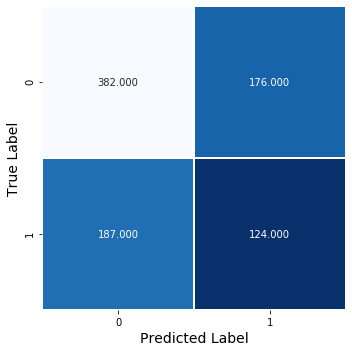

In [101]:
confusionMatrix(y_test,dt.predict(X_test))

# Aggiunta delle feature sui dataset

Di seguito vengono formattati i dataset del 2017, 2018 e 2019 per utilizzare nei modelli di decisione

In [102]:
df2017 = loadDataset("2017")
df2017 = generalFormatting(df2017)
df2017.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2017")

Loaded 2017


In [103]:
df2018 = loadDataset("2018")
df2018 = addFieldWR(df2018,8)
df2018.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2018")

# need this for adding rateo in 2019
df2018noswap = df2018

# work on 2018 for training the model
randomSwap(df2018,1700)
addPrevWin(df2018)
addRateo(df2017,df2018)

print("2018 Ready")

addFieldWR
fieldWinLose
Loaded dataset 201 7
1343
Processing all player 1342/1343
Adding rateo 2636/2637
Loaded 2018
Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_winningField', 'P1_losingField', 'P2_winningField', 'P2_losingField']
Random swap 1699/1700
adding win streak / lose streak 2636/2637
2018 Ready


In [104]:
df2019 = loadDataset("2019")
df2019 = addFieldWR(df2019,9)
df2019.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2', 'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2019")

# 2019 ready for go
addPrevWin(df2019)
randomSwap(df2019,1700)

print("Ready 2019")

addFieldWR
fieldWinLose
Loaded dataset 201 8
1381
Processing all player 1380/1381
Adding rateo 2609/2610
Loaded 2019
adding win streak / lose streak 2609/2610
Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_winningField', 'P1_losingField', 'P2_winningField', 'P2_losingField', 'P1_precWin', 'P2_precWin', 'P1_precLose', 'P2_precLose']
Random swap 1699/1700
Ready 2019


# Test dell'albero di decisione con le feature aggiunte

In [105]:
X = df2018.drop(["Player1", "Player2","target"], axis = 1)
y = df2018["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

GiniTreeArr = []

# Esploro variando il numero di foglie
for max_leaves in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    GiniTreeArr.append(tuple([test_acc,max_leaves, dt]))
    # print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(GiniTreeArr)[0], "| number leaves",max(GiniTreeArr)[1] )

max Accuracy 0.8002296211251435 | number leaves 42


In [106]:
# Information Gain Split

X = df2018.drop(["Player1", "Player2","target"], axis = 1)
y = df2018["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

InfoTreeArr = []

# Esploro variando il numero di foglie
for max_leaves in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves, criterion ="entropy")
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    InfoTreeArr.append(tuple([test_acc,max_leaves, dt]))
    # print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(InfoTreeArr)[0], "| number leaves",max(InfoTreeArr)[1] )

max Accuracy 0.7864523536165328 | number leaves 40


In [107]:
bestTree = max(GiniTreeArr)[2]
bestTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=42,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

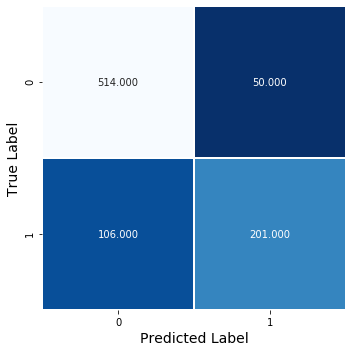

In [108]:
confusionMatrix(y_test,bestTree.predict(X_test))

Text(0, 0.5, 'Feature importance %')

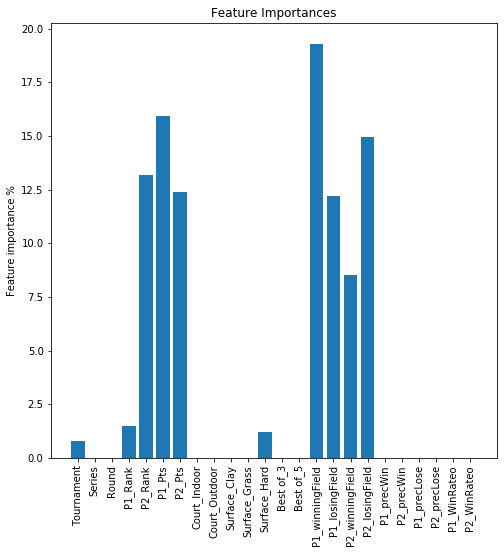

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(X_test.columns, bestTree.feature_importances_ * 100)
plt.xticks(np.arange(0, len(X_test.columns)), rotation = "vertical")
ax.set_title("Feature Importances")
ax.set_ylabel("Feature importance %")

# AGGIUNGERE ESPLOSO DELL'ALBERO DI DECISIONE

Vengono provati gli algoritmi di bagging e boosting per vedere di quando è possibile migliorare un albero di decisione

In [110]:
# try bagging
from sklearn.ensemble import BaggingClassifier

for i in range(1,15):
    bagged_dt = BaggingClassifier(bestTree, n_estimators=i)

    bagged_dt.fit(X_train,y_train)
    print ("Accuracy:", accuracy_score(y_true=y_test, y_pred=bagged_dt.predict(X_test)) )

Accuracy: 0.7611940298507462
Accuracy: 0.7726750861079219
Accuracy: 0.7956371986222732
Accuracy: 0.7921928817451206
Accuracy: 0.8082663605051664
Accuracy: 0.8208955223880597
Accuracy: 0.8197474167623421
Accuracy: 0.8082663605051664
Accuracy: 0.8151549942594719
Accuracy: 0.8208955223880597
Accuracy: 0.7967853042479908
Accuracy: 0.801377726750861
Accuracy: 0.8163030998851895
Accuracy: 0.8220436280137773


In [126]:
# boosting
from sklearn.ensemble import AdaBoostClassifier

for i in range(1,15):
    bagged_dt = AdaBoostClassifier(bestTree, n_estimators=i)

    bagged_dt.fit(X_train,y_train)
    print ("Accuracy:", accuracy_score(y_true=y_test, y_pred=bagged_dt.predict(X_test)) )

Accuracy: 0.7818599311136625
Accuracy: 0.7887485648679678
Accuracy: 0.7933409873708381
Accuracy: 0.8128587830080367
Accuracy: 0.8082663605051664
Accuracy: 0.8082663605051664
Accuracy: 0.8117106773823192
Accuracy: 0.8128587830080367
Accuracy: 0.7876004592422503
Accuracy: 0.8071182548794489
Accuracy: 0.7887485648679678
Accuracy: 0.8036739380022963
Accuracy: 0.8094144661308841
Accuracy: 0.8117106773823192


# Random forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

X = df2018.drop(["Player1", "Player2" ,"target"], axis = 1)
y = df2018["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

forestArr = []
rfArr = []

for forest in range(2,100):
    print("making forest with {} trees".format(forest), end ="\r")
    # train and predict
    rf = RandomForestClassifier(n_estimators=forest)
    rf.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))
    forestArr.append(tuple([test_acc,forest, rf]))
    # print ("Forest:", forest, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("") 
print("max Accuracy",max(forestArr)[0], "| number of trees",max(forestArr)[1] )

bestForest = max(forestArr)[2]


making forest with 99 trees
max Accuracy 0.8541905855338691 | number of trees 91


In [113]:
bestForest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=91,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
# Feature importance in RF
for i,col in enumerate(X_test.columns):
    print("Feature '{}' importance {:.2f} %".format(col, bestForest.feature_importances_[i]*100))

Feature 'Tournament' importance 4.66 %
Feature 'Series' importance 1.70 %
Feature 'Round' importance 2.51 %
Feature 'P1_Rank' importance 8.46 %
Feature 'P2_Rank' importance 8.08 %
Feature 'P1_Pts' importance 9.07 %
Feature 'P2_Pts' importance 9.31 %
Feature 'Court_Indoor' importance 0.58 %
Feature 'Court_Outdoor' importance 0.45 %
Feature 'Surface_Clay' importance 0.77 %
Feature 'Surface_Grass' importance 0.75 %
Feature 'Surface_Hard' importance 1.05 %
Feature 'Best of_3' importance 0.51 %
Feature 'Best of_5' importance 0.42 %
Feature 'P1_winningField' importance 9.58 %
Feature 'P1_losingField' importance 10.07 %
Feature 'P2_winningField' importance 10.13 %
Feature 'P2_losingField' importance 12.03 %
Feature 'P1_precWin' importance 2.44 %
Feature 'P2_precWin' importance 1.74 %
Feature 'P1_precLose' importance 1.12 %
Feature 'P2_precLose' importance 2.12 %
Feature 'P1_WinRateo' importance 1.21 %
Feature 'P2_WinRateo' importance 1.24 %


Text(0, 0.5, 'Feature importance %')

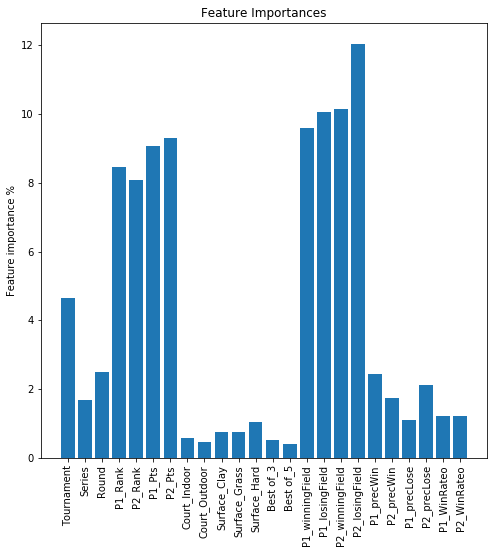

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(X_test.columns, bestForest.feature_importances_ * 100)
plt.xticks(np.arange(0, len(X_test.columns)), rotation = "vertical")
ax.set_title("Feature Importances")
ax.set_ylabel("Feature importance %")

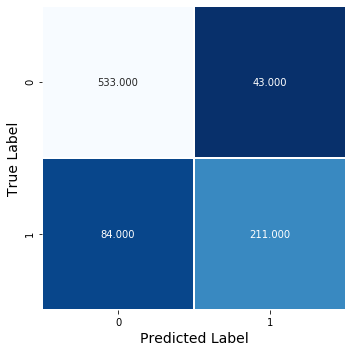

In [116]:
confusionMatrix(y_test,bestForest.predict(X_test))

# ROC - AUC 

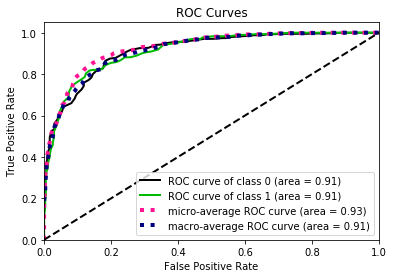

In [117]:
import scikitplot as skplt

y_score = bestForest.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_score)
plt.show()

# Recursive Feature Elimination (RFE)

In [127]:
# Recursive Feature Elimination 
from sklearn.feature_selection import RFE

from itertools import compress

X = df2018.drop(["Player1","Player2" ,"target"], axis = 1)
y = df2018["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

n = 6

selector = RFE(rf, 
                 step=1, # features removed at each step
                 n_features_to_select= n # selected features
                )
selector.fit(X_train,y_train)



print("Top {} important feature selected".format(n))

print(list(compress(X_test.columns.tolist(),selector.support_)))

Top 6 important feature selected
['P1_Pts', 'P2_Pts', 'P1_winningField', 'P1_losingField', 'P2_winningField', 'P2_losingField']


In [128]:
test_acc = accuracy_score(y_true=y_test, y_pred=selector.predict(X_test))

print ("Test Accuracy:", test_acc)

Test Accuracy: 0.8541905855338691


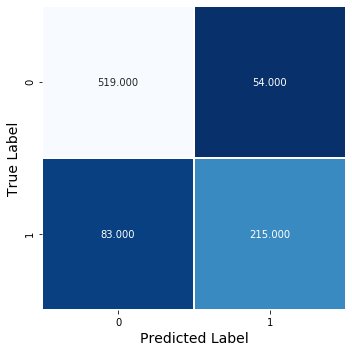

In [120]:
confusionMatrix(y_test,selector.predict(X_test))

# Tournament Simulation

Viene simulato il torneo con i diversi modelli di previsione per vederne il loro risultato

In [121]:
tournamentSimulation(df2019.loc[139:265,:], df2018noswap, bestTree)

['Player', 'Rank', 'Pts', 'winningField', 'losingField', 'precWin', 'precLose']
Round 1
64
Round 2
32
Round 3
16
Round 4
8
Round 5
4
Round 6
2
Round 7
1


,Player,Rank,Pts,winningField,losingField,precWin,precLose
0,Anderson K.,6.0,4810.0,0.607735,0.392265,11,0


In [122]:
tournamentSimulation(df2019.loc[139:265,:], df2018noswap, bestForest)

['Player', 'Rank', 'Pts', 'winningField', 'losingField', 'precWin', 'precLose']
Round 1
64
Round 2
32
Round 3
16
Round 4
8
Round 5
4
Round 6
2
Round 7
1


,Player,Rank,Pts,winningField,losingField,precWin,precLose
0,Krueger M.,230.0,216.0,0.333333,0.666667,7,0


In [123]:
tournamentSimulation(df2019.loc[139:265,:], df2018noswap, selector)

['Player', 'Rank', 'Pts', 'winningField', 'losingField', 'precWin', 'precLose']
Round 1
64
Round 2
32
Round 3
16
Round 4
8
Round 5
4
Round 6
2
Round 7
1


,Player,Rank,Pts,winningField,losingField,precWin,precLose
0,Thiem D.,8.0,4095.0,0.553672,0.446328,7,0
